In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [3]:
tokenizer = Tokenizer()
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
#     -O /tmp/sonnets.txt
data = open('./sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [4]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [5]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 24s 50ms/step - loss: 6.9131 - accuracy: 0.0205
Epoch 2/100
484/484 [==============================] - 24s 50ms/step - loss: 6.5013 - accuracy: 0.0215
Epoch 3/100
484/484 [==============================] - 24s 50ms/step - loss: 6.4019 - accuracy: 0.0243
Epoch 4/100
484/484 [==============================] - 24s 51ms/step - loss: 6.2922 - accuracy: 0.0318
Epoch 5/100
484/484 [==============================] - 25s 51ms/step - loss: 6.1902 - accuracy: 0.0354
Epoch 6/100
484/484 [==============================] - 25s 51ms/step - loss: 6.0969 - accuracy: 0.0374
Epoch 7/100
484/484 [==============================] - 25s 51ms/step - loss: 6.0161 - accuracy: 0.0413
Epoch 8/100
484/484 [==============================] - 25s 51ms/step - loss: 5.9217 - accuracy: 0.0474
Epoch 9/100
484/484 [==============================] - 25s 52ms/step - loss: 5.8148 - accuracy: 0.0560
Epoch 10/100
484/484 [==============================] - 25s 51ms/step - l

484/484 [==============================] - 24s 50ms/step - loss: 1.4338 - accuracy: 0.7567
Epoch 80/100
484/484 [==============================] - 24s 50ms/step - loss: 1.4293 - accuracy: 0.7516
Epoch 81/100
484/484 [==============================] - 27s 55ms/step - loss: 1.4144 - accuracy: 0.7546
Epoch 82/100
484/484 [==============================] - 25s 53ms/step - loss: 1.3854 - accuracy: 0.7634
Epoch 83/100
484/484 [==============================] - 25s 51ms/step - loss: 1.3795 - accuracy: 0.7613
Epoch 84/100
484/484 [==============================] - 25s 52ms/step - loss: 1.3700 - accuracy: 0.7664
Epoch 85/100
484/484 [==============================] - 26s 53ms/step - loss: 1.3456 - accuracy: 0.7687
Epoch 86/100
484/484 [==============================] - 26s 53ms/step - loss: 1.3217 - accuracy: 0.7728
Epoch 87/100
484/484 [==============================] - 24s 50ms/step - loss: 1.3145 - accuracy: 0.7740
Epoch 88/100
484/484 [==============================] - 24s 50ms/step - loss:

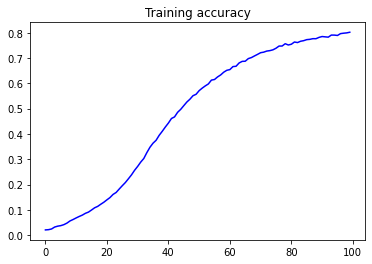

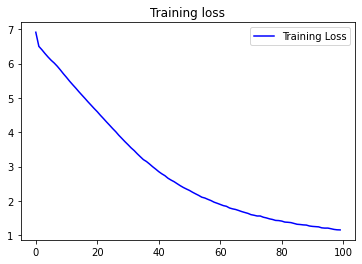

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [7]:
model.save('sonnets.h5')

In [9]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope surmise mad did frame prove prove wrong back offence threw offence give 'will' or new 'will' or forth born on too delight decrease gay dyed fall there lack days had lived shows till remain beloved might hence defy last up forth pain lie still forth cross forth thee ' lived still one alone none seen hide thine best much show men date mother sad cries none brought to lend thee light give crave forth thee meet seen fill some cured part on seen will spend remain groan shows down till seen she seen brought to store by convert convert date
